In [1]:
import os
import sys
import glob
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

import math
from scipy          import stats
from scipy.optimize import curve_fit

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('/Users/romoluque_c/Repositories/BACON_romo/')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 14

In [5]:
filename = '/Users/romoluque_c/LEGEND/BACON/new_setup/datatest/run-11_25_2024-file_78.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

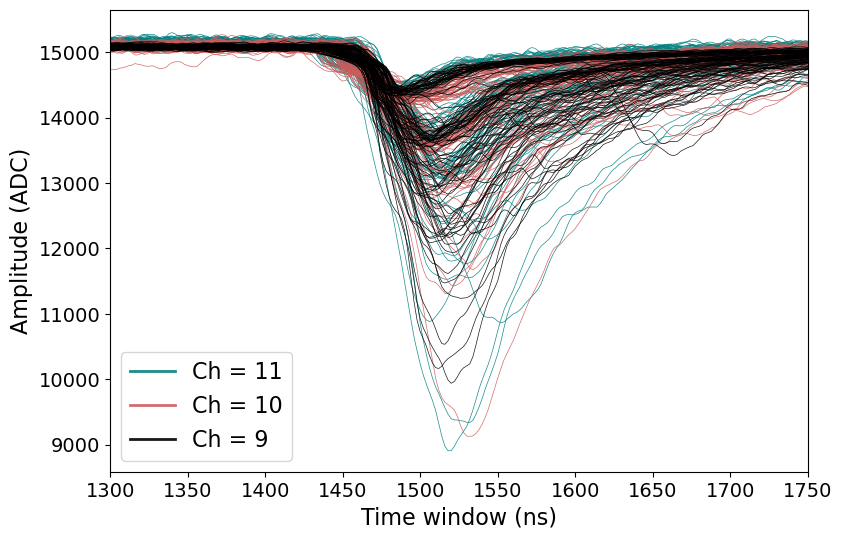

In [6]:
for ch, col in zip([11, 10, 9], ['teal', 'indianred', 'k']):
    wfs = np.array(RawTree[f'chan{ch}/rdigi'].array())[:100]
    for i, wf in enumerate(wfs):
        if i==0:
            lab = f'Ch = {ch}'
        else:
            lab = ''
        plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, color=col, alpha=0.9, label=lab)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADC)',  fontsize=16)
plt.xlim(1300, 1750)
leg = plt.legend(fontsize=16)
for line in leg.get_lines():
    line.set_linewidth(2)
plt.show()

### Compare according to light levels:

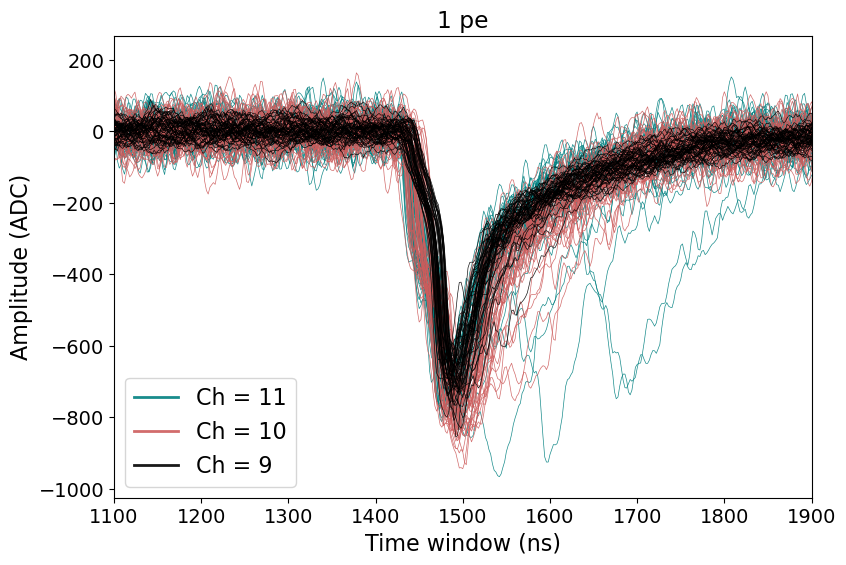

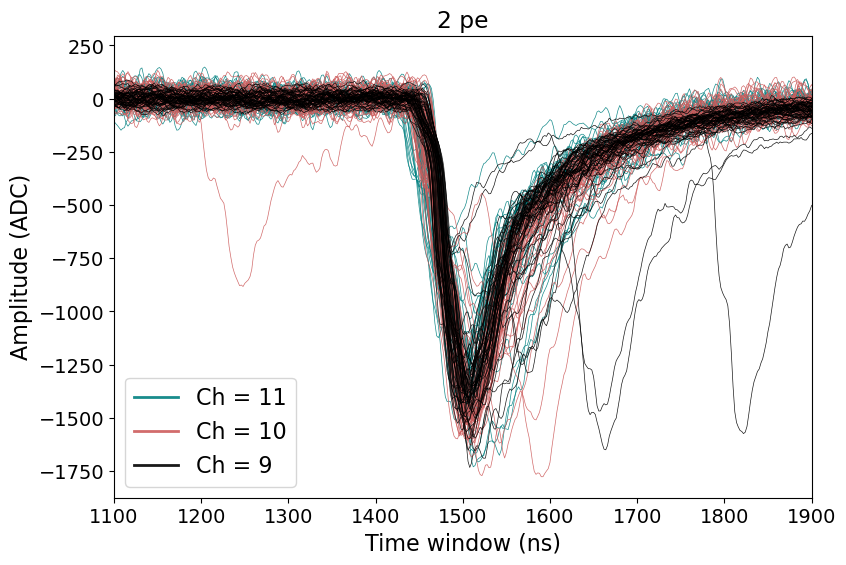

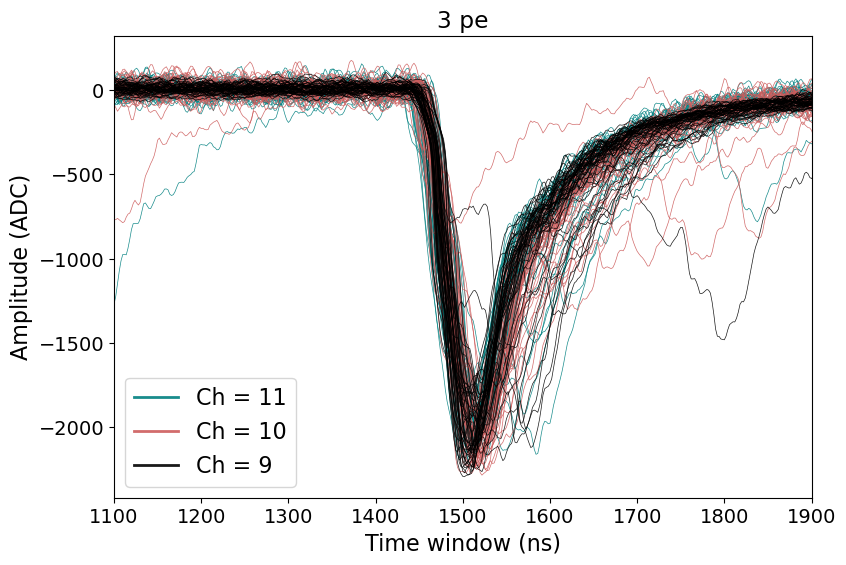

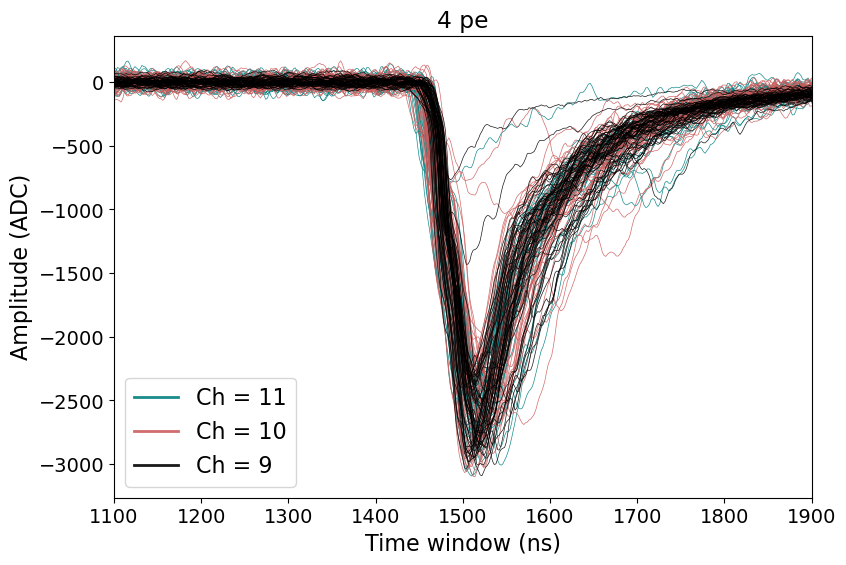

In [7]:
for n_pe, min_rg in zip([1, 2, 3, 4], [(-1000, -500), (-1800, -1000), (-2300, -1800), (-3100, -2300)]):
    for ch, col in zip([11, 10, 9], ['teal', 'indianred', 'k']):
        wfs      = np.array(RawTree[f'chan{ch}/rdigi'].array())[:500]
        subt_wfs = pf.subtract_baseline(wfs, mode=False, wf_range_bsl=(0, 650))
        i = 0
        for wf in subt_wfs:
            if (np.min(wf) > min_rg[0]) & (np.min(wf) < min_rg[1]):
                if i==0:
                    lab = f'Ch = {ch}'
                else:
                    lab = ''
                plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, color=col, alpha=0.9, label=lab)
                i += 1
                if i>50:
                    break
    plt.xlabel('Time window (ns)', fontsize=16)
    plt.ylabel('Amplitude (ADC)',  fontsize=16)
    plt.title(f'{n_pe} pe')
    plt.xlim(1100, 1900)
    leg = plt.legend(fontsize=16)
    for line in leg.get_lines():
        line.set_linewidth(2)
    plt.show()

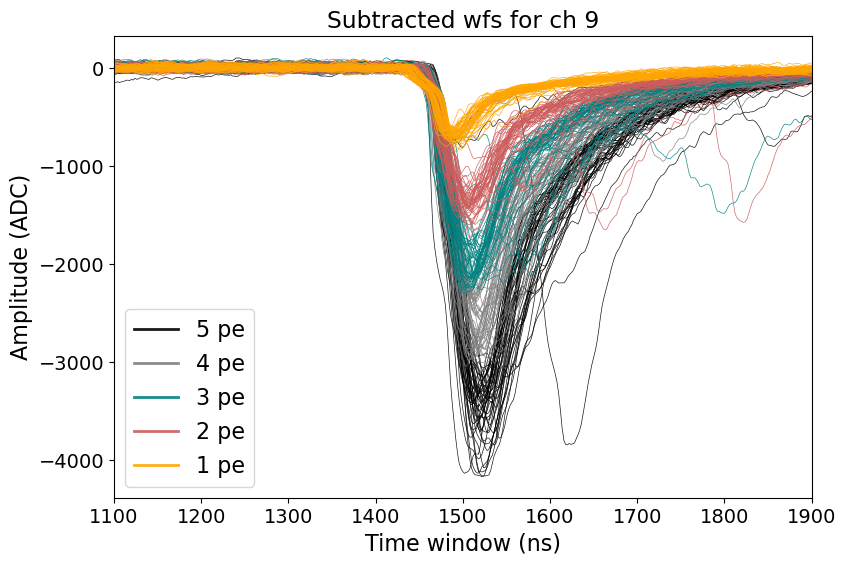

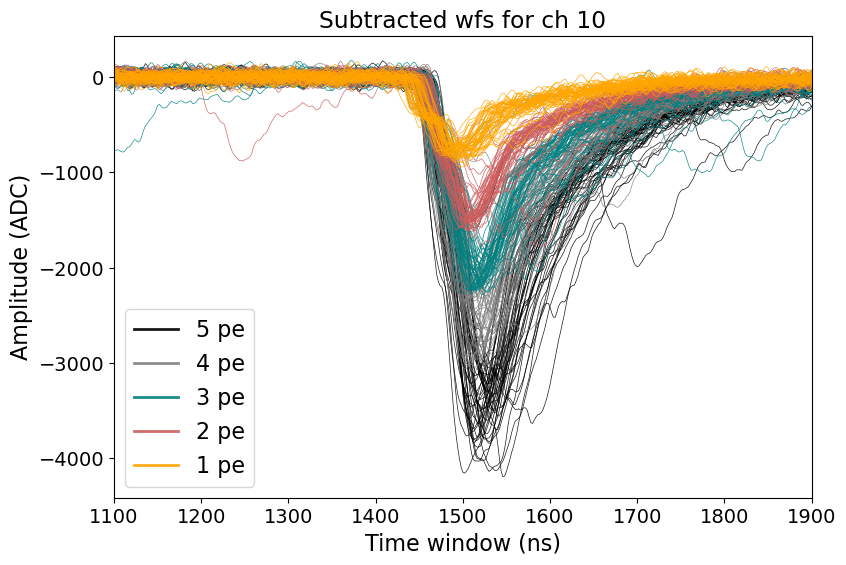

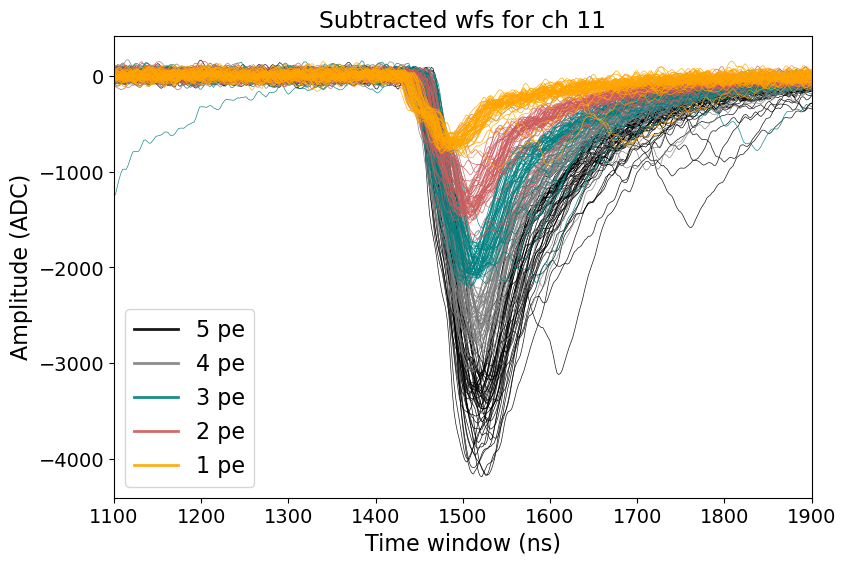

In [8]:
for ch in [9, 10, 11]:
    for n_pe, min_rg, col in zip([5,4,3,2,1],[(-4200,-3100),(-3100,-2300),(-2300,-1800),(-1800,-1000),(-1000,-500),],['k','grey','teal','indianred','orange']):
        wfs      = np.array(RawTree[f'chan{ch}/rdigi'].array())[:1000]
        subt_wfs = pf.subtract_baseline(wfs, mode=False, wf_range_bsl=(0, 650))
        i = 0
        for wf in subt_wfs:
            if (np.min(wf) > min_rg[0]) & (np.min(wf) < min_rg[1]):
                if i==0:
                    lab = f'{n_pe} pe'
                else:
                    lab = ''
                plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, color=col, alpha=0.9, label=lab)
                i += 1
                if i>50:
                    break
    plt.xlabel('Time window (ns)', fontsize=16)
    plt.ylabel('Amplitude (ADC)',  fontsize=16)
    plt.title(f'Subtracted wfs for ch {ch}')
    plt.xlim(1100, 1900)
    leg = plt.legend(fontsize=16)
    for line in leg.get_lines():
        line.set_linewidth(2)
    plt.show()

In [9]:
def get_idx_crossing_value(swf, val=-200, wf_rng=(700,750)):
    closest_idx = np.argmin(np.abs(swf[wf_rng[0]:wf_rng[1]] - val))
    return (closest_idx+wf_rng[0])*2

In [10]:
trigg_ts_dict = {}
min_wfs_dict  = {}
for val_crossing in [200, 400, 600]:
    trigg_ts_val_dict = {}
    min_wfs_val_dict  = {}
    for ch in [9, 10, 11]:
        trigg_ts = []
        min_wfs  = []
        wfs      = np.array(RawTree[f'chan{ch}/rdigi'].array())
        subt_wfs = pf.subtract_baseline(wfs, mode=False, wf_range_bsl=(0, 650))
        for wf in subt_wfs:
            trigg_ts.append(get_idx_crossing_value(wf, val=-val_crossing, wf_rng=(700,750)))
            min_wfs .append(np.min(wf))
            
        trigg_ts_val_dict[ch] = trigg_ts
        min_wfs_val_dict [ch] = min_wfs

    trigg_ts_dict[val_crossing] = trigg_ts_val_dict
    min_wfs_dict [val_crossing] = min_wfs_val_dict

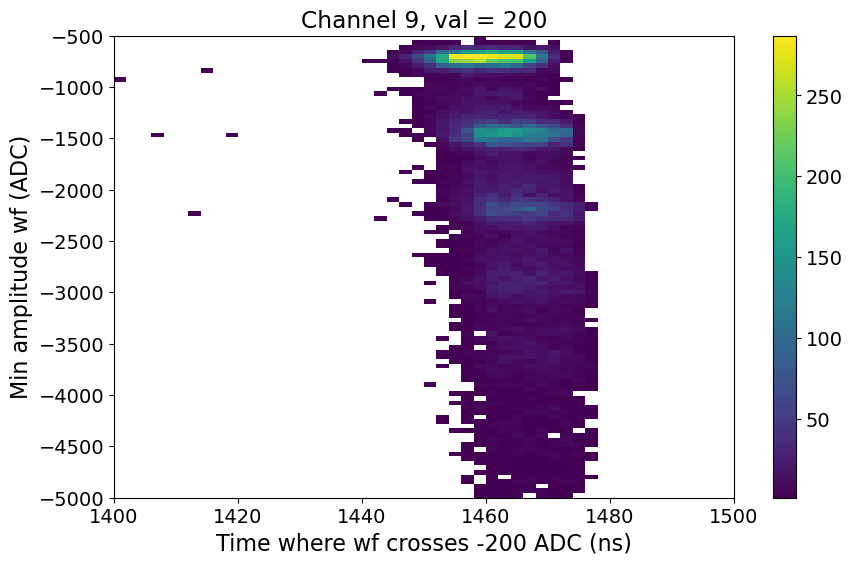

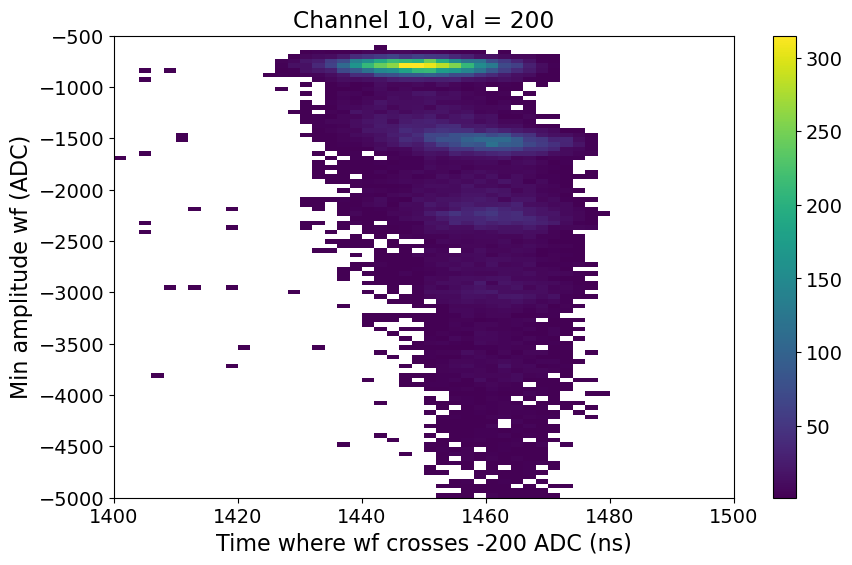

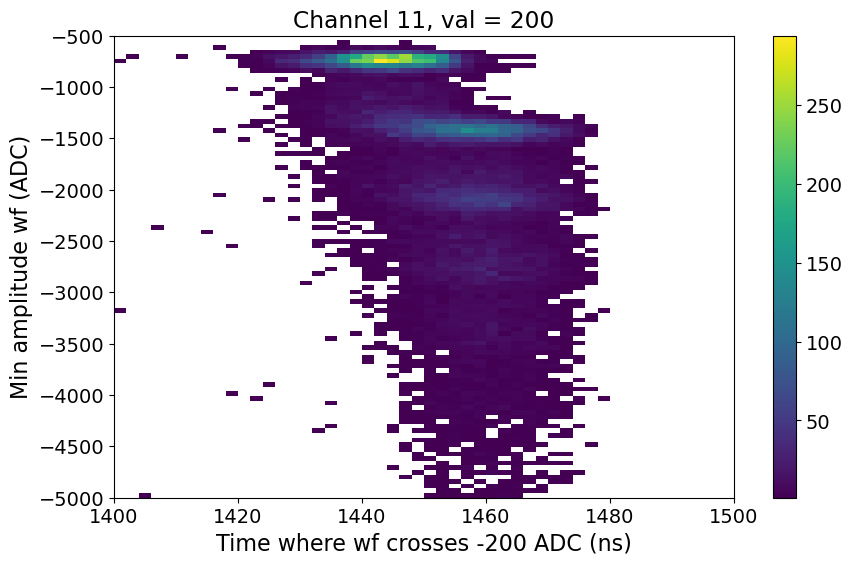

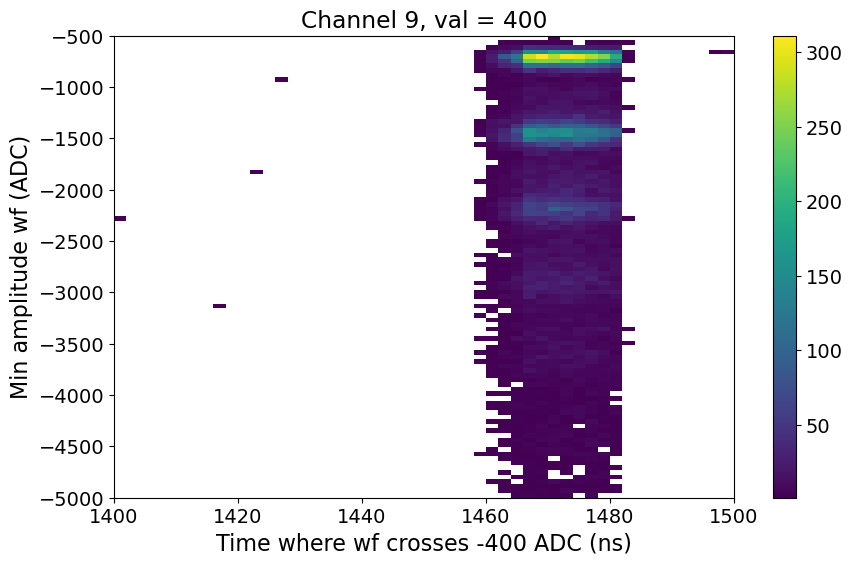

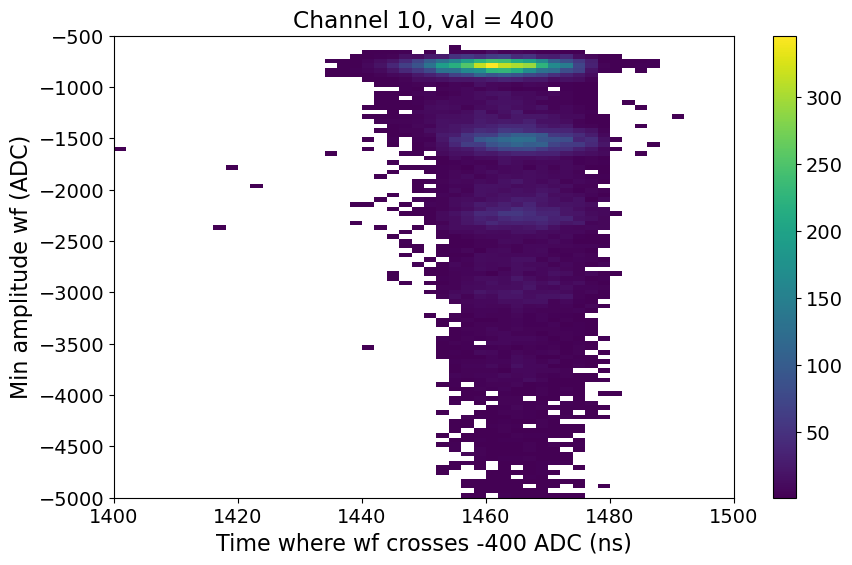

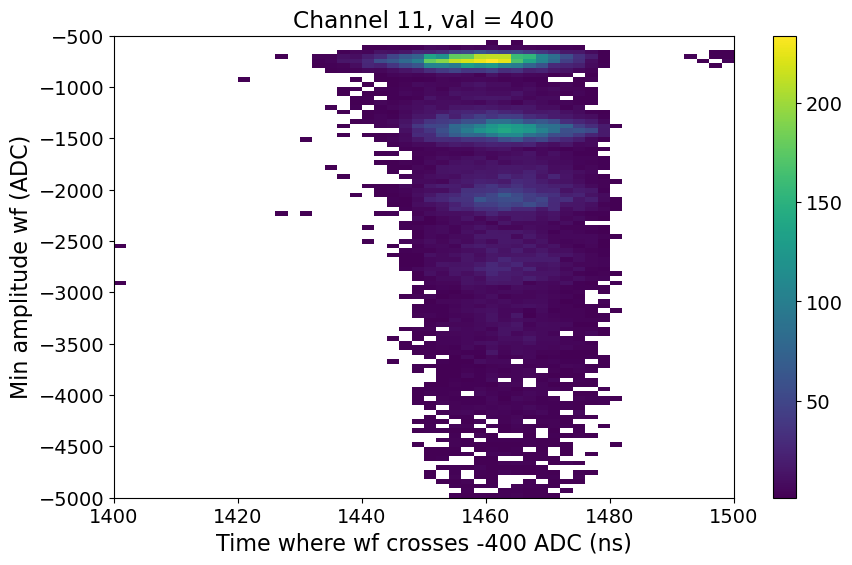

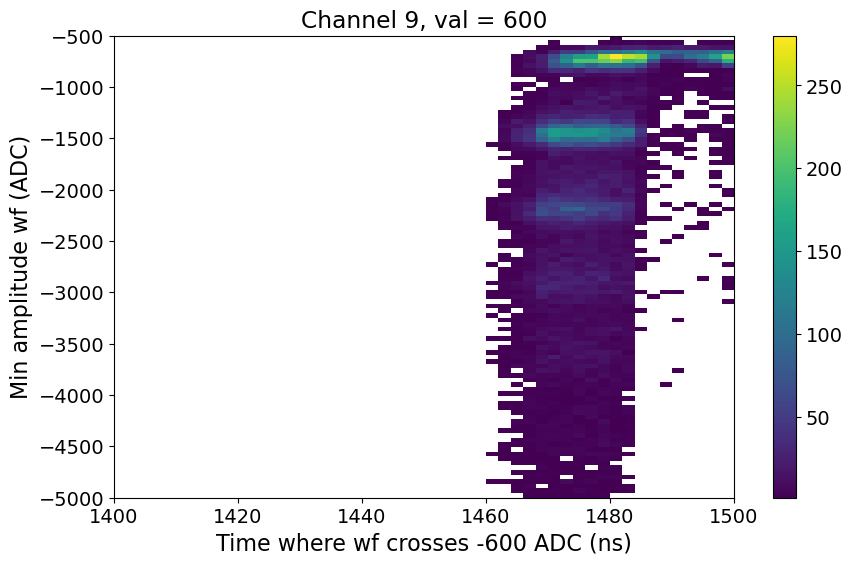

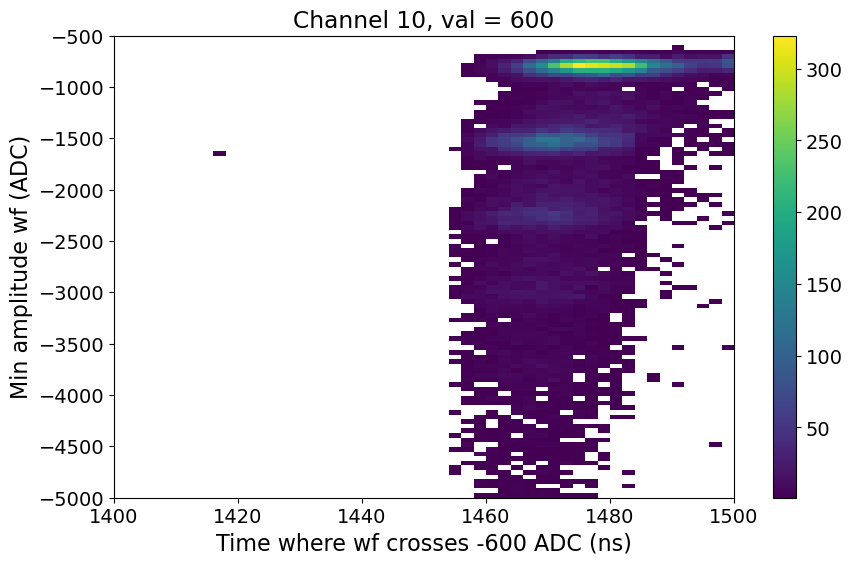

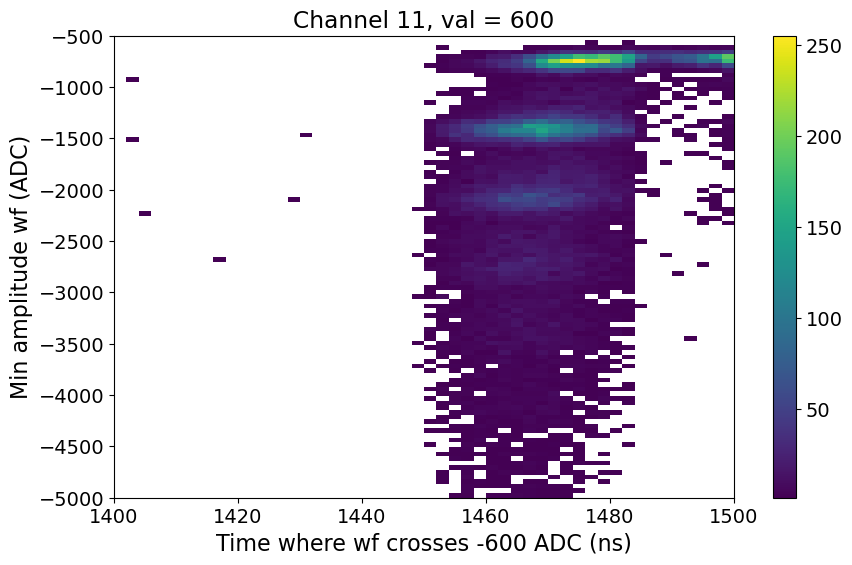

In [11]:
for val_crossing in [200, 400, 600]:
    for ch in [9, 10, 11]:
        plt.figure(figsize=(10, 6))
        plt.hist2d(trigg_ts_dict[val_crossing][ch], min_wfs_dict[val_crossing][ch], bins=(50, 100), range=((1400, 1500), (-5000, -500)), cmin=1)
        plt.title(f'Channel {ch}, val = {val_crossing}')
        plt.xlabel(f'Time where wf crosses -{val_crossing} ADC (ns)', fontsize=16)
        plt.ylabel('Min amplitude wf (ADC)',  fontsize=16)
        plt.colorbar()
        plt.show()

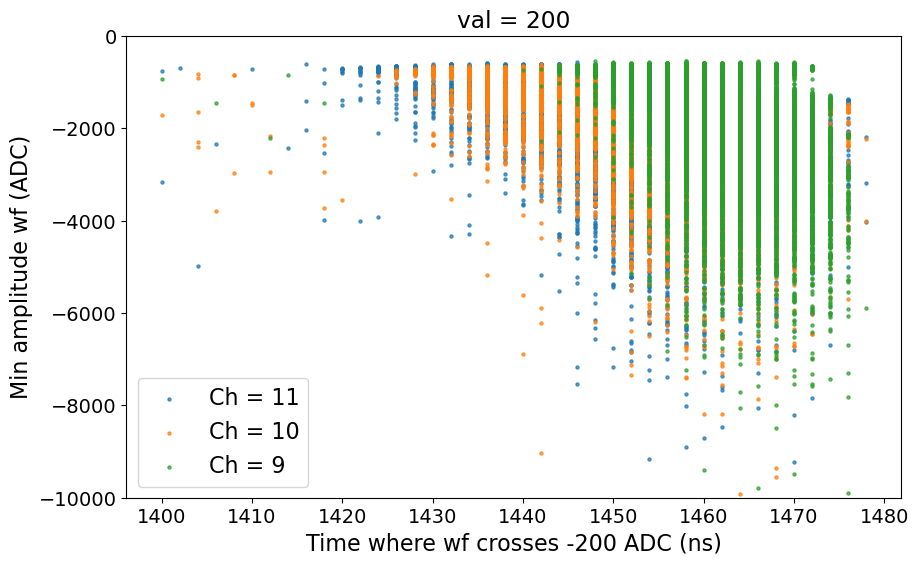

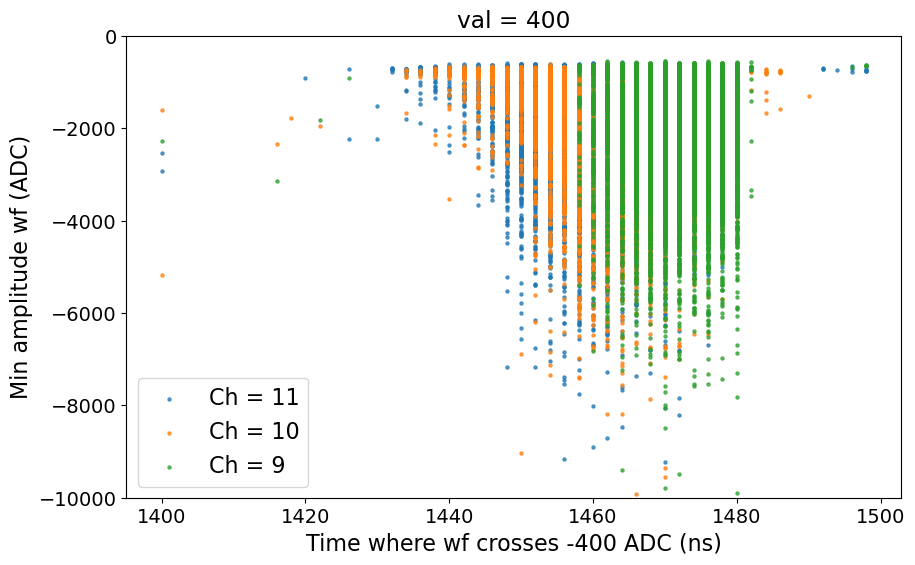

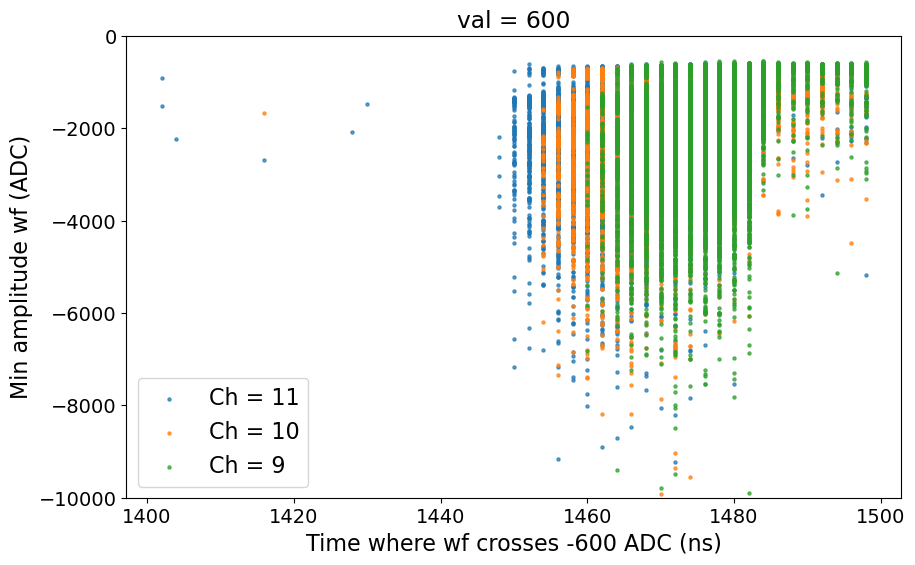

In [12]:
for val_crossing in [200, 400, 600]:
    plt.figure(figsize=(10, 6))
    for ch in [11, 10, 9]:
        plt.scatter(trigg_ts_dict[val_crossing][ch], min_wfs_dict[val_crossing][ch], s=5, alpha=0.7, label=f'Ch = {ch}')
    plt.title(f'val = {val_crossing}')
    plt.xlabel(f'Time where wf crosses -{val_crossing} ADC (ns)', fontsize=16)
    plt.ylabel('Min amplitude wf (ADC)',  fontsize=16)
    plt.ylim(-10000, 0)
    plt.legend(fontsize=16)
    plt.show()

26


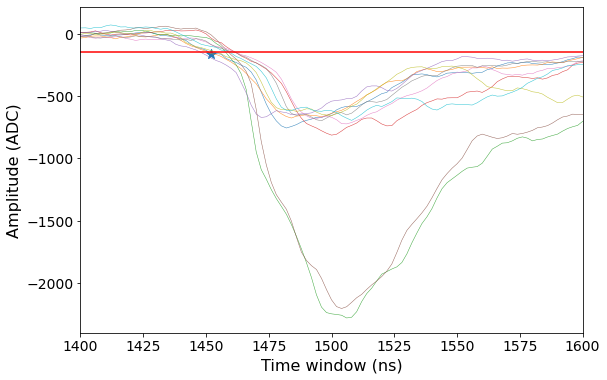

In [94]:
ch      = 9
one_wf  = np.array(RawTree[f'chan{ch}/rdigi'].array())[0]
subt_wf = pf.subtract_baseline(one_wf, mode=False, wf_range_bsl=(0, 650))
closest_idx = np.argmin(np.abs(subt_wf[700:750] + 150))
print(closest_idx)
plt.scatter((closest_idx+700)*2, subt_wf[closest_idx+700], marker='*', s=100)
plt.plot(2*np.arange(len(subt_wf)), subt_wf, linewidth=0.5, alpha=0.9)

few_wfs     = np.array(RawTree[f'chan{ch}/rdigi'].array())[1:10]
few_subt_wf = pf.subtract_baseline(few_wfs, mode=False, wf_range_bsl=(0, 650))
for swf in few_subt_wf:
    plt.plot(2*np.arange(len(swf)), swf, linewidth=0.5, alpha=0.9)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADC)',  fontsize=16)
plt.axhline(-150, color='r')
plt.xlim(1400, 1600)
plt.show()

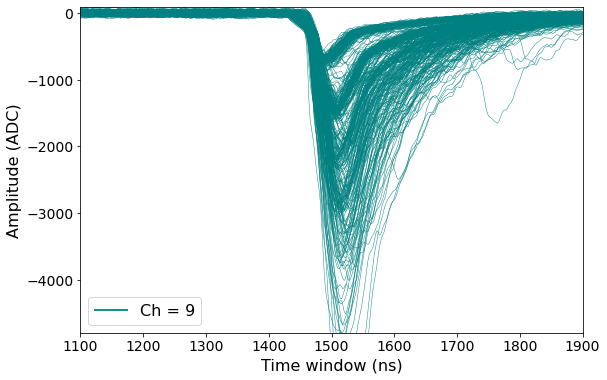

In [53]:
for ch, col in zip([9], ['teal', 'indianred', 'k']):
    wfs      = np.array(RawTree[f'chan{ch}/rdigi'].array())[:400]
    subt_wfs = pf.subtract_baseline(wfs, mode=False, wf_range_bsl=(0, 650))
    i = 0
    for wf in subt_wfs:
        if i==0:
            lab = f'Ch = {ch}'
        else:
            lab = ''
        plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, color=col, alpha=0.9, label=lab)
        i += 1
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADC)',  fontsize=16)
plt.xlim(1100, 1900)
plt.ylim(-4800, 100)
leg = plt.legend(fontsize=16)
for line in leg.get_lines():
    line.set_linewidth(2)
plt.show()